In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/My Drive/household_power_consumption/household_power_consumption.txt', sep = ';', header=0, low_memory=False,
                 parse_dates={'datetime' : ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], index_col='datetime')

In [ ]:
#import io
#df = pd.read_csv('household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True,
 #                parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [5]:
print (df)

                     Global_active_power  ...  Sub_metering_3
datetime                                  ...                
2006-12-16 17:24:00                4.216  ...            17.0
2006-12-16 17:25:00                5.360  ...            16.0
2006-12-16 17:26:00                5.374  ...            17.0
2006-12-16 17:27:00                5.388  ...            17.0
2006-12-16 17:28:00                3.666  ...            17.0
...                                  ...  ...             ...
2010-11-26 20:58:00                0.946  ...             0.0
2010-11-26 20:59:00                0.944  ...             0.0
2010-11-26 21:00:00                0.938  ...             0.0
2010-11-26 21:01:00                0.934  ...             0.0
2010-11-26 21:02:00                0.932  ...             0.0

[2075259 rows x 7 columns]


In [6]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [7]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
df.isna()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,False,False,False,False,False,False,False
2006-12-16 17:25:00,False,False,False,False,False,False,False
2006-12-16 17:26:00,False,False,False,False,False,False,False
2006-12-16 17:27:00,False,False,False,False,False,False,False
2006-12-16 17:28:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,False,False,False,False,False,False,False
2010-11-26 20:59:00,False,False,False,False,False,False,False
2010-11-26 21:00:00,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [20]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [21]:
values = df.values.astype('float32')

In [22]:
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [23]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.099998
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,39.666668
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,43.700001
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,43.666668
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,43.133335


In [24]:
#Filling missing data by Mean
df.mean()

Global_active_power        1.091615
Global_reactive_power      0.123714
Voltage                  240.839858
Global_intensity           4.627759
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
sub_metering_4             9.317223
dtype: float64

In [25]:
df = df.fillna(df.mean())

In [26]:
#Check
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

In [27]:
df_daily = df.resample('D').sum()
print(df_daily)

            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...    14680.933594
2006-12-17             3390.460  ...    36946.667969
2006-12-18             2203.826  ...    19028.433594
2006-12-19             1666.194  ...    13131.900391
2006-12-20             2225.748  ...    20384.800781
...                         ...  ...             ...
2010-11-22             2041.536  ...    16924.599609
2010-11-23             1577.536  ...    16352.266602
2010-11-24             1796.248  ...    13769.466797
2010-11-25             1431.164  ...    17278.732422
2010-11-26             1488.104  ...    13347.733398

[1442 rows x 8 columns]


Text(0, 0.5, 'Global')

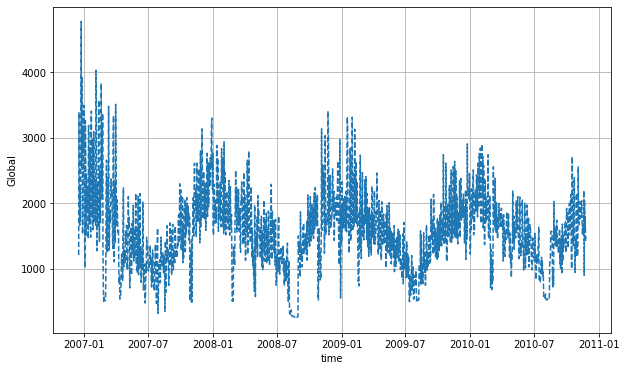

In [28]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Global_active_power, '--' ,  )
plt.grid()
plt.xlabel( 'time' )
plt.ylabel( 'Global' )

In [18]:
df = df.fillna(df.mean())

In [30]:
from scipy.stats import pearsonr

In [33]:
list1 = df['Global_active_power'] 
list2 = df['Global_reactive_power'] 

In [34]:
coo = pearsonr(list1, list2)

In [36]:
print( coo)

(0.24701705264406518, 0.0)


In [29]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


In [37]:
from fbprophet import Prophet

In [42]:
df = pd.read_csv('/content/drive/My Drive/household_power_consumption/household_power_consumption.txt', sep = ';', header=0, low_memory=False,
                 parse_dates={'datetime' : ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], index_col='datetime')

In [43]:
df = df.fillna(df.mean())

In [44]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [47]:
df_mon = df[['Global_active_power']]
df_mon.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666
